# MNIST Prediction with Convolutional Neural Network

In [88]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import layers

## 1. Utils Functions

In [89]:
def plot_data(X: np.ndarray, y: np.ndarray) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

    len_x = X.shape[0]
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]

        img_idx = np.random.randint(0, len_x)

        ax.imshow(X[img_idx], cmap="gray")
        ax.set(xticks=[], yticks=[])

        true_label = f"True: {y[img_idx]}"
        ax.set_xlabel(true_label)

    plt.tight_layout()
    plt.show()

## 2. Load Data

In [90]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

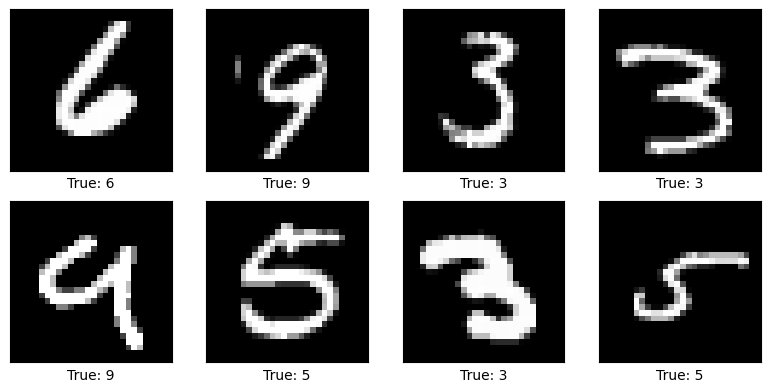

In [91]:
plot_data(X_train, y_train)

## 3. Image Preprocessing

In [92]:
# Convert to float32 and scale to [0, 1]
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [93]:
# Add channel dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [94]:
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [95]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 4. Artificial Neural Network

### 4.1. With Convolutional Neural Network

### 4.2 With Keras

In [96]:
inp_shape = X_train.shape[1:]

In [97]:
model = keras.models.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [100]:
batch_size = 128
epochs = 15

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0168 - val_accuracy: 0.9948
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0274 - val_accuracy: 0.9938
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0257 - val_accuracy: 0.9932
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0315 - val_accuracy: 0.9933
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0363 - val_accuracy: 0.9930
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0334 - val_accuracy: 0.9928
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0385 - val_accuracy: 0.9923
Epoch 

In [101]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1572089046239853
Test accuracy: 0.982200026512146


In [103]:
y_pred = model.predict(X_test)

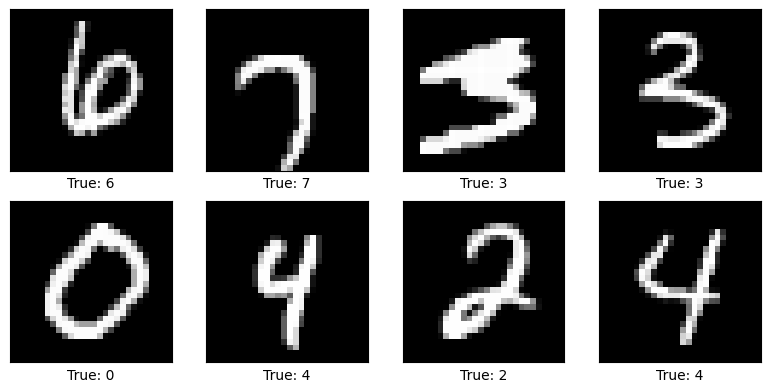

In [113]:
plot_data(X_test, np.argmax(y_pred, axis=1))